In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [3]:
df = pd.read_csv("data.csv",names = columns )

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:

# Replace '?' with NaN in the relevant columns
df[["ca", "thal"]] = df[["ca", "thal"]].replace('?', np.nan)

In [7]:
df[["ca", "thal"]] = df[["ca", "thal"]].astype(float)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [11]:
'''  
df.replace('?', np.nan, inplace = True)
'''

"  \ndf.replace('?', np.nan, inplace = True)\n"

In [12]:
df.groupby('sex').agg(
      {
    'age':'mean',
    "chol": 'mean',
    "thalach":'mean'  }
)

,age,chol,thalach
sex,,,
0.0,55.721649,261.752577,151.226804
1.0,53.834951,239.601942,148.844660


In [13]:
df.groupby('target')[['age','chol','thalach']].mean().head()

,age,chol,thalach
target,,,
0,52.585366,242.640244,158.378049
1,55.381818,249.109091,145.927273
2,58.027778,259.277778,135.583333
3,56.000000,246.457143,132.057143
4,59.692308,253.384615,140.615385


In [14]:
df.pivot_table(values='chol',index="cp",columns='target',aggfunc='mean')

target,0,1,2,3,4
cp,,,,,
1.0,229.875000,262.200000,234.00,NaN,231.000000
2.0,240.682927,254.166667,246.00,300.000000,NaN
3.0,245.279412,236.222222,247.75,238.750000,230.000000
4.0,245.333333,249.685714,262.10,243.827586,257.545455


In [15]:
df.pivot_table('chol',"cp",'target','mean')

target,0,1,2,3,4
cp,,,,,
1.0,229.875000,262.200000,234.00,NaN,231.000000
2.0,240.682927,254.166667,246.00,300.000000,NaN
3.0,245.279412,236.222222,247.75,238.750000,230.000000
4.0,245.333333,249.685714,262.10,243.827586,257.545455


# Data Visualization

Text(0, 0.5, 'Frequency')

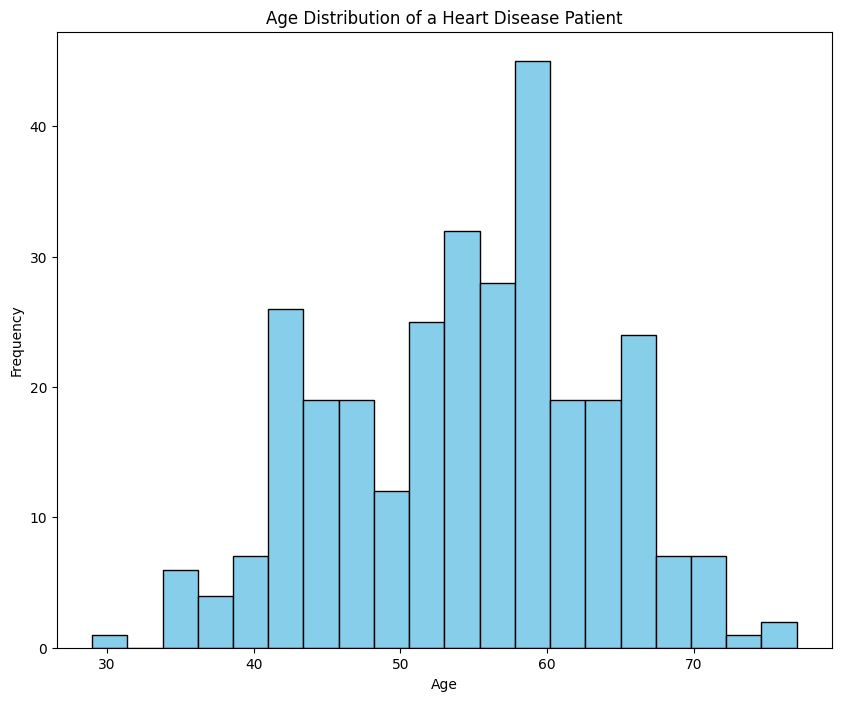

In [17]:
plt.figure(figsize=(10,8))
plt.hist(x=df["age"],bins=20,color="skyblue",edgecolor="black")
plt.title("Age Distribution of a Heart Disease Patient")
plt.xlabel("Age")
plt.ylabel("Frequency")

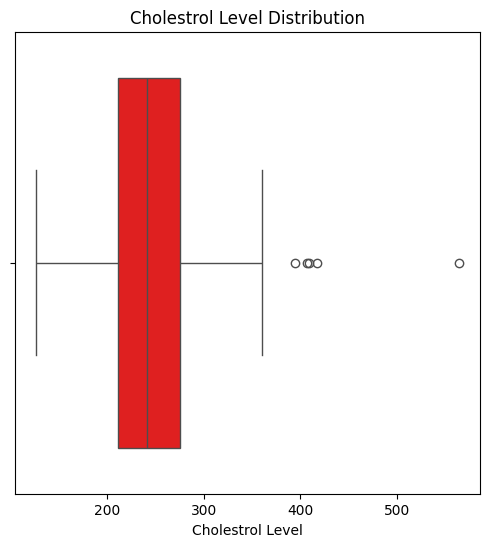

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x="chol", data = df, color="red")
plt.title("Cholestrol Level Distribution")
plt.xlabel("Cholestrol Level")
plt.show()

In [19]:
df[df["chol"] >= 500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


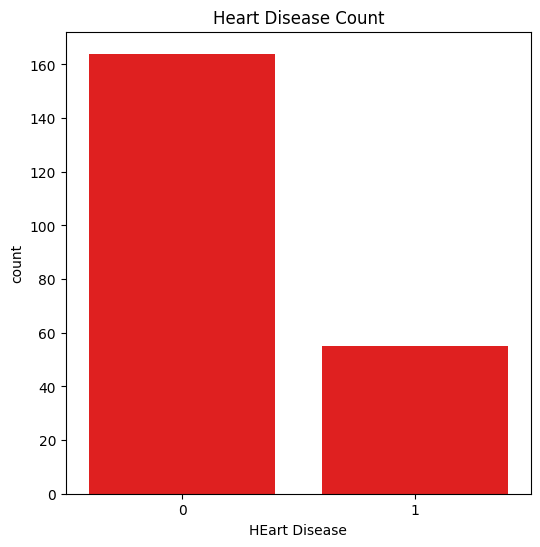

In [20]:
df = df[df["target"].isin([0,1])]
plt.figure(figsize=(6,6))
sns.countplot(x="target", data = df, color="red")
plt.title("Heart Disease Count")
plt.xlabel("HEart Disease")
plt.show()

In [21]:
corr= df.corr(numeric_only = True)

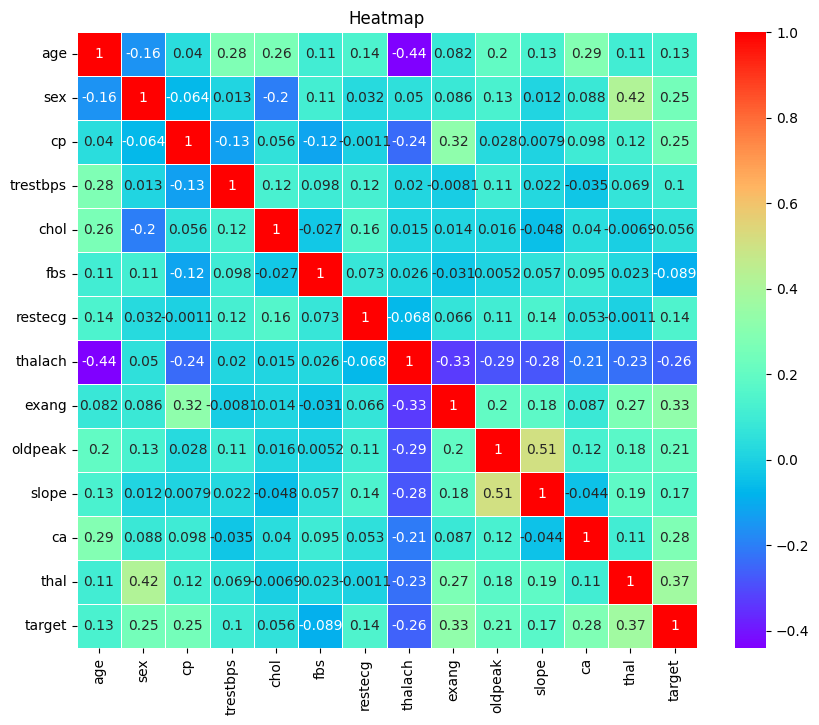

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap( data = corr, annot= True, linewidths=0.5, cbar = True, cmap="rainbow")
plt.title("Heatmap")
plt.show()

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        1
target      0
dtype: int64

In [24]:
df.dropna(inplace=True)

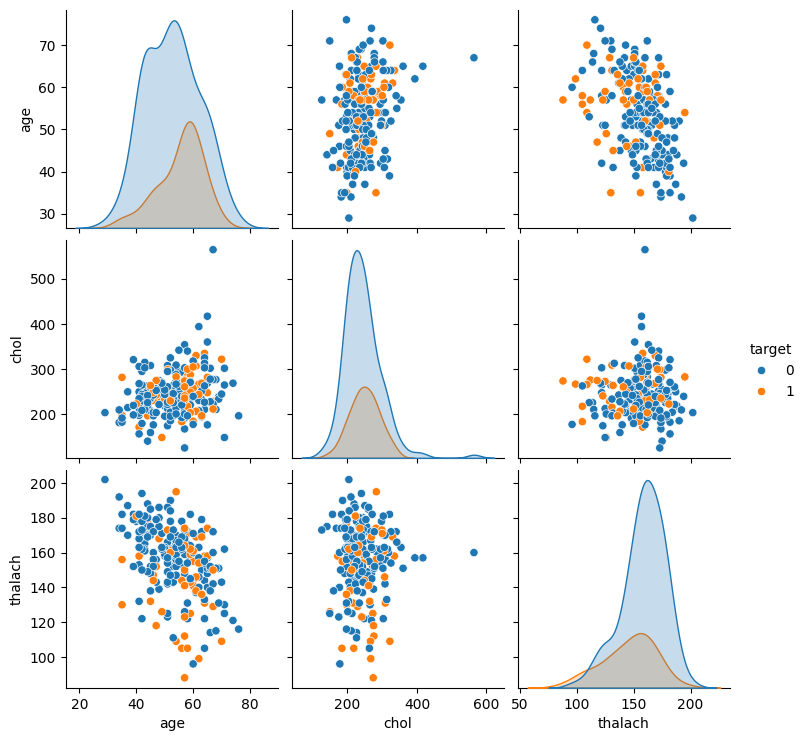

In [25]:
sns.pairplot( data = df[["age", "chol","thalach","target"]], hue="target")
plt.show()

# Test Train Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X = df.drop('age', axis=1)  # Features
y = df['age']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable using the test set
y_pred = model.predict(X_test)

# Display the predictions
print("Predictions:", y_pred[:10])

Predictions: [47.85685831 53.89995995 54.58037587 45.79034439 50.34154088 61.49887939
 48.02439965 49.22376356 43.26832084 51.00777894]


In [29]:
# Logistic Regression

In [30]:

from sklearn.linear_model import LogisticRegression

In [31]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target (heart disease: 0 = no, 1 = yes)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [34]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.7441860465116279
Precision: 0.6242424242424243
Recall: 0.6339869281045751


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))

Decision Tree Accuracy: 0.627906976744186
Precision: 0.5153846153846154
Recall: 0.5196078431372549


# K-Means

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
# Replacing '?' with NaN and removing rows with missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Features and target (although we won't use 'target' directly for clustering)
X = df.drop('target', axis=1)

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows after scaling
print(X_scaled[:5])

[[ 1.04290802  0.77266741 -1.98665632  0.87702029 -0.23504119  2.68900897
   1.08541654 -0.26019403 -0.53050648  1.85430291  2.58436014 -0.54010638
   1.02302403]
 [ 1.47711487  0.77266741  1.10156004 -0.60546266 -0.31391037 -0.37188422
   1.08541654 -1.27170958  1.88499111  2.20320751  0.89822273  2.21186422
   1.58294   ]
 [-1.77943645  0.77266741  0.07215459 -0.01246948  0.10015279 -0.37188422
  -0.92565826  1.52200003 -0.53050648  3.24992129  2.58436014 -0.54010638
  -0.65672387]
 [-1.34522961 -1.29421791 -0.95725087 -0.01246948 -0.8068427  -0.37188422
   1.08541654  0.79948892 -0.53050648  0.80758914 -0.78791468 -0.54010638
  -0.65672387]
 [ 0.28304605  0.77266741 -0.95725087 -0.60546266 -0.17588931 -0.37188422
  -0.92565826  1.08849337 -0.53050648  0.10977995 -0.78791468 -0.54010638
  -0.65672387]]


In [100]:
# Apply K-Means clustering (starting with K=2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
y_kmeans = kmeans.labels_

# Add the cluster labels to the dataset for visualization
df['Cluster'] = y_kmeans

# Show the first few rows with cluster labels
print(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'target', 'Cluster']].head())

    age  sex   cp  trestbps   chol  target  Cluster
0  63.0  1.0  1.0     145.0  233.0       0        0
2  67.0  1.0  4.0     120.0  229.0       1        0
3  37.0  1.0  3.0     130.0  250.0       0        0
4  41.0  0.0  2.0     130.0  204.0       0        1
5  56.0  1.0  2.0     120.0  236.0       0        1


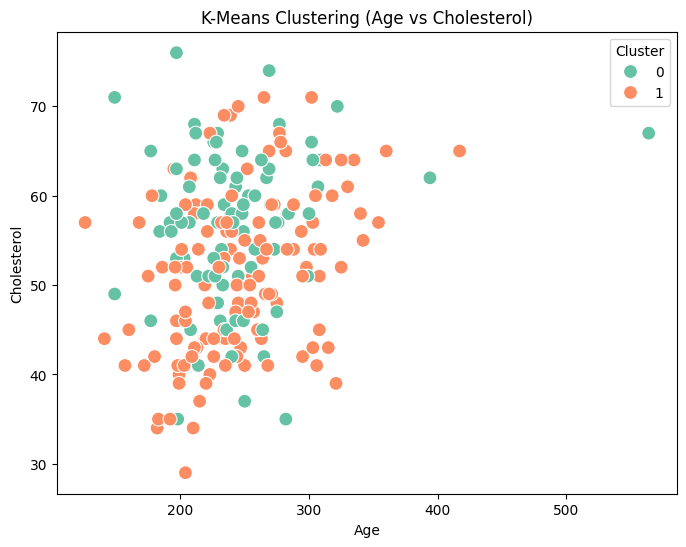

In [108]:
# Scatter plot of two features (Age vs Cholesterol) colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chol', y='age', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('K-Means Clustering (Age vs Cholesterol)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [116]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.14216497233310865


# Albo Method

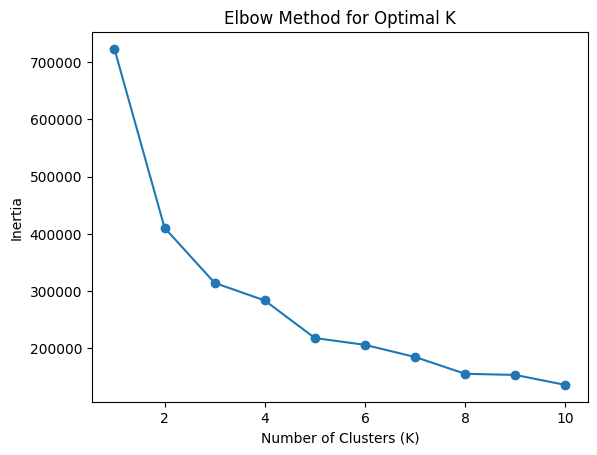

In [119]:
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()